# Logistic Regression MLP and SGD for Classifying Music Emotions
---
## About the Dataset

For this experiment, our dataset contains 267 music samples that were labelled by 2 music experts. The dataset has a combination of high level and low level features. The high level features are tempo, arousal, and scale, which were all labelled by the music experts. The low level features were extracted from the music samples using the JAudio software.

---
## Libraries

We used the pandas and csv libraries to load the dataset, which is a csv file. Then we used numpy to manipulate the loaded dataset. We used the sci kit learn library for the logistic regression, multilayer perceptron and stochastic gradient descent  algorithms. The XLB file is where we modularized the training and validation process

In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from XLB import *

import warnings
warnings.filterwarnings('ignore')

Here we load the data from the csv file and preprocess it by removing the header row and the filename column this is done by the extract_data function from the XLB file which takes the filename of the dataset as a parameter

---

After the initial preprocessing step, we sperated the music features and the labelled emotion into the x_train and y_train arrays respectively. We also used the scikit learn min max scaler to normalize the dataset.

In [2]:
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

scaler_val = MinMaxScaler()
scaler.fit(x_val)
x_val = scaler.transform(x_val)

(401, 327)
(401, 324)
(401,)
(21, 327)
(21, 324)
(21,)


Here we perform different methods to deal with imbalanced datasets. We used the oversampling and SMOTE methodology 

In [3]:
rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)

x_smote, y_smote = oversampler.fit_resample(x_train,y_train)

print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)

x_os, y_os = oversampler.fit_resample(x_train,y_train)

print(x_os.shape,y_os.shape)

(750, 324) (750,)
(750, 324) (750,)


The following cells are the experiments we ran with the default dataset, oversampled version, and SMOTE version using random search as the hyperparameter search algorithm

---
This cell instantiates the logistic regression object and the hyperparameter search object.

In [4]:
# LogisticRegression, RandomizedSearch
random_search_iterations = 100
k_folds = 5
rand_seed = 3249807

parameters = {
    'penalty':['l1','l2'], 
    'C': uniform(loc=0,scale=4),
    'fit_intercept' : [True,False],
    'solver' : ['liblinear', 'saga'],
    'max_iter' : [100,200,300,400,500]
}
mnb = LogisticRegression(random_state=rand_seed)
random_search_logreg = RandomizedSearchCV(mnb, parameters,cv=k_folds,\
                                          n_iter=random_search_iterations,\
                                          random_state=rand_seed,n_jobs=-1)

The following cells are where the logistice regression model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set

In [ ]:
print_res("Vanilla",x_train,y_train,random_search_logreg)

In [ ]:
print_res("Random Oversampling",x_os,y_os,random_search_logreg)

In [ ]:
print_res("SMOTE",x_smote,y_smote,random_search_logreg)

This cell instantiates the multilayer perceptron object and the hyperparameter search object.

In [4]:
# MLPClassifier, RandomizedSearch
random_search_iterations = 50
k_folds = 10
rand_seed = 3249807

parameters = {
    'activation':['logistic', 'tanh', 'relu'], 
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha': [3e-4],
    'batch_size' : [min(200,int(np.power(2,i))) for i in range(4,8)],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'max_iter' : [700],
    'shuffle' : [True,False],
    'momentum' : uniform(loc=0.2,scale=0.8),
    'nesterovs_momentum' : [True,False],
    'early_stopping' : [True,False]
}
mlp = MLPClassifier(random_state=rand_seed)
random_search_mlp = RandomizedSearchCV(mlp, parameters,cv=k_folds,\
                                       n_iter=random_search_iterations,\
                                       random_state=rand_seed, n_jobs=-1)

The following cells are where the multilayer perceptron model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set.

Best Score: 0.3341
activation => relu
alpha => 0.0003
batch_size => 16
early_stopping => True
learning_rate => adaptive
max_iter => 700
momentum => 0.8422744294200903
nesterovs_momentum => False
shuffle => False
solver => sgd
Splits: 10
Vanilla Train Accuracy: 33.9152%
Vanilla Validation Accuracy: 23.81%
Vanilla F1-score: 0.13


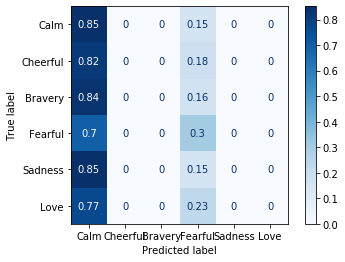

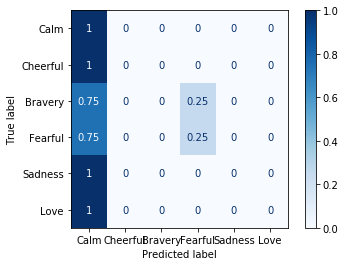

In [5]:
print_res("Vanilla",x_train,y_train,random_search_mlp)
test_res("Vanilla",x_val,y_val,random_search_mlp)

Best Score: 0.7920
activation => logistic
alpha => 0.0003
batch_size => 32
early_stopping => True
learning_rate => invscaling
max_iter => 700
momentum => 0.24751577108983086
nesterovs_momentum => False
shuffle => False
solver => lbfgs
Splits: 10
Random Oversampling Train Accuracy: 99.8667%
Random Oversampling Validation Accuracy: 19.05%
Random Oversampling F1-score: 0.15


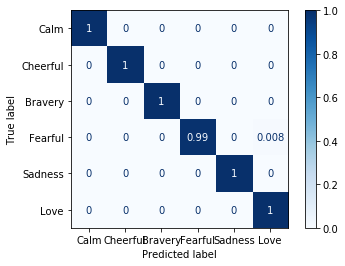

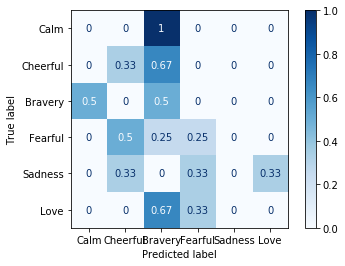

In [6]:
print_res("Random Oversampling",x_os,y_os,random_search_mlp)
test_res("Random Oversampling",x_val,y_val,random_search_mlp)

Best Score: 0.7320
activation => relu
alpha => 0.0003
batch_size => 16
early_stopping => False
learning_rate => adaptive
max_iter => 700
momentum => 0.8511013917812551
nesterovs_momentum => False
shuffle => True
solver => lbfgs
Splits: 10
SMOTE Train Accuracy: 99.8667%
SMOTE Validation Accuracy: 9.52%
SMOTE F1-score: 0.09


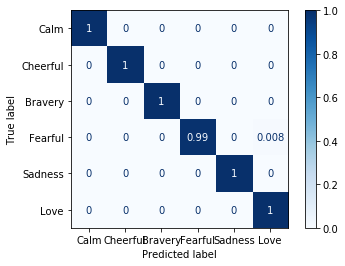

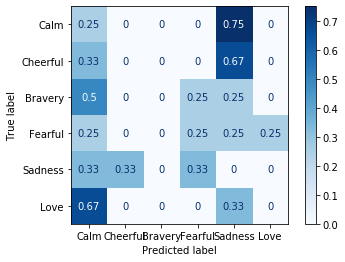

In [7]:
print_res("SMOTE",x_smote,y_smote,random_search_mlp)
test_res("SMOTE",x_val,y_val,random_search_mlp)

This cell instantiates the Stochastic Gradient Descent object and the hyperparameter search object.

In [4]:
# SGDClassifier, RandomizedSearch
random_search_iterations = 200
k_folds = 5
rand_seed = 3249807

parameters = {
    'loss' : [ 'hinge', 'log', 'modified_huber', 'squared_hinge', \
              'perceptron', 'squared_loss', 'huber', \
              'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty' : ['l2', 'l1', 'elasticnet'],
    'alpha': [1 / np.power(10,x) for x in range(1,10)],
    'l1_ratio': uniform(loc=0,scale=1),
    'fit_intercept' : [True, False],
    'max_iter' : [100,200,300,400,500],
    'shuffle' : [True, False],
    'eta0' : uniform(loc=0.01,scale=0.99),
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'early_stopping' : [True, False],
    'warm_start' : [True, False],
    'average' : [True,False]
}
sgdc = SGDClassifier(random_state=rand_seed)
random_search_sgdc = RandomizedSearchCV(sgdc, parameters,cv=k_folds,\
                                        n_iter=random_search_iterations,\
                                        random_state=rand_seed, n_jobs=-1)

The following cells are where the stochastic gradient descent model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set.

Vanilla:
Best Score: 0.3416
alpha => 1e-05
average => True
early_stopping => True
eta0 => 0.05010230091623275
fit_intercept => False
l1_ratio => 0.9253620646171374
learning_rate => invscaling
loss => huber
max_iter => 300
penalty => elasticnet
shuffle => True
warm_start => False
Splits: 5
Accuracy: 41.8699%


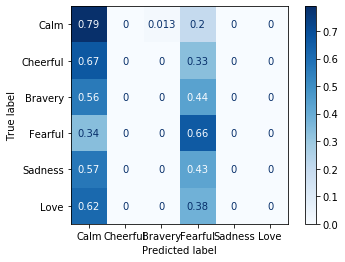

In [5]:
print_res("Vanilla",x_train,y_train,random_search_sgdc)

Random Oversampling:
Best Score: 0.5570
alpha => 1e-07
average => False
early_stopping => False
eta0 => 0.9075245383241642
fit_intercept => True
l1_ratio => 0.03529543330654061
learning_rate => adaptive
loss => modified_huber
max_iter => 400
penalty => l1
shuffle => True
warm_start => True
Splits: 5
Accuracy: 72.1491%


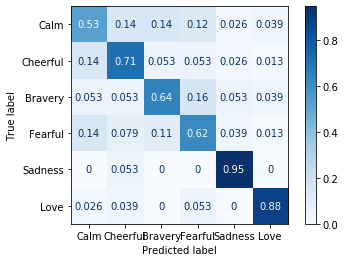

In [6]:
print_res("Random Oversampling",x_os,y_os,random_search_sgdc)

SMOTE:
Best Score: 0.5726
alpha => 1e-07
average => False
early_stopping => False
eta0 => 0.9075245383241642
fit_intercept => True
l1_ratio => 0.03529543330654061
learning_rate => adaptive
loss => modified_huber
max_iter => 400
penalty => l1
shuffle => True
warm_start => True
Splits: 5
Accuracy: 74.5614%


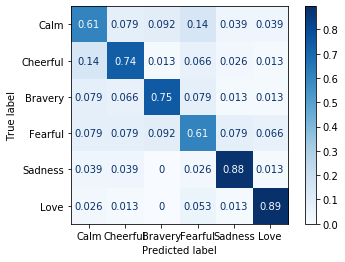

In [7]:
print_res("SMOTE",x_smote,y_smote,random_search_sgdc)